In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_column',None)
from sklearn.linear_model import LinearRegression
from warnings import filterwarnings

In [31]:
df = pd.read_csv("headbrain.csv")

In [32]:
df.head()

,Gender,Age Range,Head Size(cm^3),BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [33]:
df.shape

(237, 4)

In [34]:
df = pd.DataFrame(df)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           237 non-null    int64
 1   Age Range        237 non-null    int64
 2   Head Size(cm^3)  237 non-null    int64
 3   BrainWeight      237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [36]:
df.isnull().sum()

Gender             0
Age Range          0
Head Size(cm^3)    0
BrainWeight        0
dtype: int64

# Target Variable : Brain Weight

C:\Users\Omkar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distplot of Brain Weight')

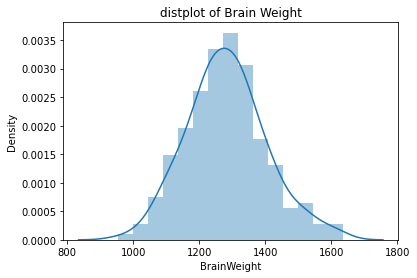

In [37]:
sns.distplot(df.BrainWeight)
plt.title('distplot of Brain Weight')

In [38]:
df.BrainWeight.describe()

count     237.000000
mean     1282.873418
std       120.340446
min       955.000000
25%      1207.000000
50%      1280.000000
75%      1350.000000
max      1635.000000
Name: BrainWeight, dtype: float64

C:\Users\Omkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of Brainweight')

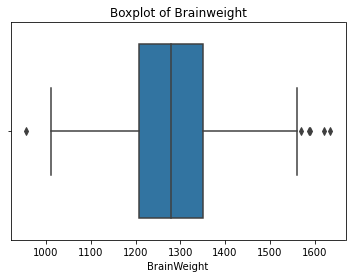

In [39]:
sns.boxplot(df.BrainWeight)
plt.title('Boxplot of Brainweight')

In [40]:
df.BrainWeight.mean()

1282.873417721519

In [41]:
df.BrainWeight.median()

1280.0

In [42]:
df.BrainWeight.min()

955

In [43]:
df.BrainWeight.max()

1635

# Removing outliers

In [47]:
Q1 = df.BrainWeight.quantile(.25)
Q3 = df.BrainWeight.quantile(.75)

IQR = Q3 - Q1
IQR

143.0

In [52]:
upper_end = Q3 + (1.5 * IQR)
lower_end = Q1 - (1.5 * IQR)
outliers = df.BrainWeight[(df.BrainWeight < lower_end) | (df.BrainWeight > upper_end)]
outliers

4      1590
24     1635
43     1570
102    1588
109    1620
209     955
Name: BrainWeight, dtype: int64

In [53]:
remove_outlier(df)

NameError: name 'remove_outlier' is not defined

C:\Users\Omkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of Brainweight')

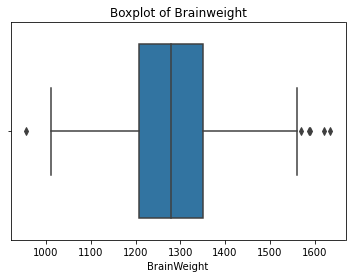

In [54]:
sns.boxplot(df.BrainWeight)
plt.title('Boxplot of Brainweight')

In [55]:
len(df.BrainWeight)

237

In [56]:
df.BrainWeight.describe()

count     237.000000
mean     1282.873418
std       120.340446
min       955.000000
25%      1207.000000
50%      1280.000000
75%      1350.000000
max      1635.000000
Name: BrainWeight, dtype: float64

In [58]:
print("Checking for any null values:\n")
print(df.isnull().any())

Checking for any null values:

Gender             False
Age Range          False
Head Size(cm^3)    False
BrainWeight        False
dtype: bool


In [59]:
print("Checking for unique values in each column:\n")
print(df.nunique())

Checking for unique values in each column:

Gender               2
Age Range            2
Head Size(cm^3)    221
BrainWeight        146
dtype: int64


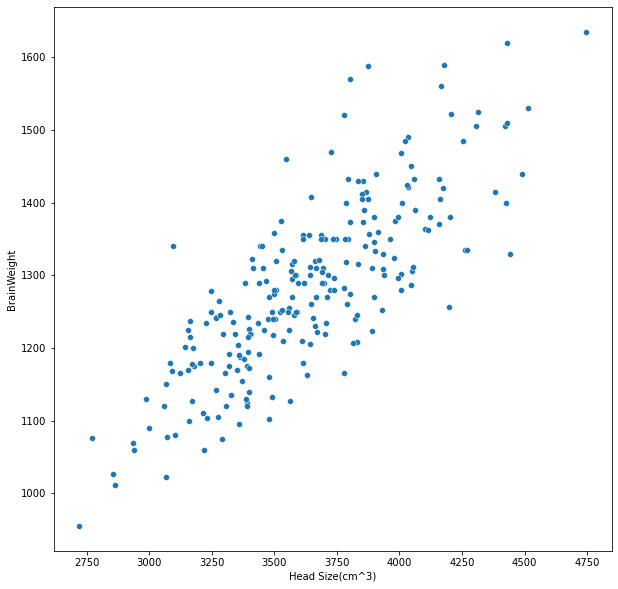

In [61]:
plt.figure(figsize=(10,10))
sns.scatterplot(y='BrainWeight',x='Head Size(cm^3)',data=df)
plt.show()

In [63]:
df  = df.values

X = df[:,2]
Y = df[:,3]

X.shape,Y.shape

((237,), (237,))

In [64]:
def Linear_Regression(X,Y):
    mean_x = np.mean(X)
    mean_y = np.mean(Y)

    n = len(X)
    numerator= 0
    denominator=0
    for i in range(n):
        numerator   += ((X[i] - mean_x) * (Y[i] - mean_y))
        denominator += ((X[i] - mean_x) ** 2)

    m = numerator/ denominator
    c = mean_y - m * mean_x
    
    return(m,c)
def predict(X,m,c):
    pred_y=[]
    for i in range(len(X)):
        pred_y.append(c + m * X[i])

    return(pred_y)

In [65]:
def r2score(y_obs,y_pred):
    yhat = np.mean(y_obs)
    
    ss_res = 0.0
    ss_tot = 0.0
    
    for i in range(len(y_obs)):
        ss_tot += (y_obs[i]-yhat)**2
        ss_res += (y_obs[i]-y_pred[i])**2
        
    r2 = 1 - (ss_res/ss_tot)

    return r2

In [68]:
from sklearn.model_selection import train_test_split

slope =  0.26189100385866426
intercept =  331.2228421304119
R-squared : 0.6715300229289938


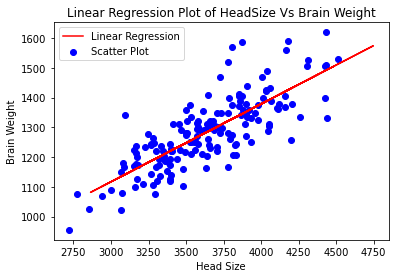

In [69]:
plt.title("Linear Regression Plot of HeadSize Vs Brain Weight")

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

m,c = Linear_Regression(X_train,y_train)
print("slope = ", m)
print('intercept = ',c)
y_pred =  predict(X_test,m,c)

print("R-squared :",r2score(y_test,y_pred))

plt.plot(X_test,y_pred,color='red',label='Linear Regression')
plt.scatter(X_train,y_train,c='b',label='Scatter Plot')
plt.xlabel("Head Size")
plt.ylabel("Brain Weight")
plt.legend()
plt.show()

In [73]:
from sklearn.metrics import r2_score

In [74]:
X = X.reshape(len(X),1)

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

reg = LinearRegression()
reg.fit(X_train,y_train)

y_predictions = reg.predict(X_test)

print("R-squared :",r2_score(y_test, y_predictions))

R-squared : 0.5882350753538284
